# Otokodlayıcılar (Autoencoders)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.optimizers import Adam

from skimage.metrics import structural_similarity as ssim


### 1)Veri Setinin Yüklenmesi 

In [2]:
(x_train,_),(x_test,_) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### 2)Veri Normalizasyonu

In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

### 3)Veri Görselleştirme

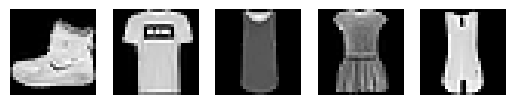

In [4]:
plt.figure()
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i],cmap = "gray" )
    plt.axis("off")
plt.show()

### 4)Veriyi Düzleştirme 
Veriyi 28x28 boyutundaki görüntüleri 784 boyutunda düzleştirme işlemi

In [5]:
x_train = x_train.reshape((len(x_train) , np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test) , np.prod(x_test.shape[1:])))

### 5)Encode - Decode Mimarisi Oluşturma

In [6]:
input_dim = x_train.shape[1] # Giriş Boyutu
encoding_dim = 64 # Latent Boyutu (Daha Küçük Boyut)

# Encoder Kısmının İnşaa Edilmesi
input_image = Input(shape = (input_dim , )) # Girdilerin boyutunu belirliyoruz
encoded = Dense(256 , activation = "relu" )(input_image)
encoded = Dense(128 , activation = "relu" )(encoded)
encoded = Dense(encoding_dim , activation = "relu" )(encoded)

#Decoder Kısmının İnşaa Edilmesi
decoded = Dense(128 , activation = "relu" )(encoded)
decoded = Dense(256 , activation = "relu" )(decoded)
decoded = Dense(input_dim , activation = "sigmoid" )(decoded)

#Autoencoder Oluşturma = Encoder + Decoder
autoencoder = Model(input_image,decoded) # Girişten çıktıya tüm yapıyı tanımlıyoruz.

In [7]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,944 (1.85 MB)

 Trainable params: 484,944 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

### 6)Modelin Derlenmesi

In [8]:
autoencoder.compile(optimizer = Adam() , loss = "binary_crossentropy")
# Girdi ve değer aynı değer olmalı |  shuffle = True : Veri Setinin kaıştırılması işlemi
history = autoencoder.fit(x_train,x_train , epochs = 50 , batch_size = 64 , shuffle = True , validation_data = (x_train , x_train) ,verbose = 1)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - loss: 0.3642 - val_loss: 0.2935
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.2906 - val_loss: 0.2838
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.2823 - val_loss: 0.2791
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.2784 - val_loss: 0.2768
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 0.2765 - val_loss: 0.2754
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.2742 - val_loss: 0.2731
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 0.2734 - val_loss: 0.2720
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 0.2718 - val_loss: 0.2711
Epoch 9/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.2709 - val_loss: 0.2703
Epoch 10/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 0.2699 - val_loss: 0.2695
Epoch 11/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 0.2697 - val_loss: 0.2691
Epoch 12/50
938/938 ━━━━━━━━━━

### 7)Modelin Test Edilmesi
Modeli encode ve decode olarak ikiye ayır

In [10]:
encoder = Model(input_image , encoded)

#decoder
encoded_input = Input(shape = (encoding_dim,) )
decoder_layer1 = autoencoder.layers[-3](encoded_input)
decoder_layer2 = autoencoder.layers[-2](decoder_layer1)
decoded_output = autoencoder.layers[-1](decoder_layer2)

decoder = Model(encoded_input , decoded_output)

#Test verisi ile encoder ve decoder ile sıkıştırma ve yeniden yapılandırma işlemi
encoded_images = encoder.predict(x_test) # Latent temsili elde ederiz
decoded_images = decoder.predict(encoded_images) # Latent temisili orijinal forma geri döndürme işlemi


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step


### 8)Orijinal ve Yeniden Yapılandırılmış Verilerin Görselleştirilmesi  

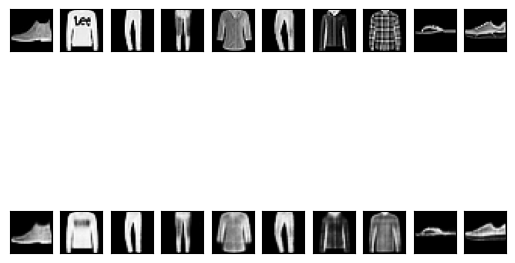

In [11]:
n = 10 
for i in range(n):
    #Orijinal Görüntüler
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28) , cmap = "gray" )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #Decoded Edilmiş Yani Yeniden Yapılandırılmış Görüntüler
    ax = plt.subplot(2 , n , i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28,28) , cmap = "gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    

### 9)SSİM Skor Hesaplanması

In [17]:
def compute_ssim(original,reconstructed):
    """
        Her iki görüntü arasındaki ssim skoru hesaplama 
    """
    original = original.reshape(28,28)
    reconstructed = reconstructed.reshape(28,28)
    return ssim(original,reconstructed,data_range = 1)

    

In [18]:
ssim_score = []
for i in range(100):
    original_img = x_test[i]
    reconstructed_img = decoded_images[i]
    score = compute_ssim(original_img,reconstructed_img)
    ssim_score.append(score)
average_ssim = np.mean(ssim_score)

In [19]:
average_ssim

0.8263185585683432